h = 0.01: Solution is Stable
h = 0.02: Solution is Stable
h = 0.03: Solution is Stable
h = 0.05: Solution is Stable
h = 0.1: Solution is Stable
h = 0.2: Solution is Stable
h = 0.3: Solution is Stable
h = 0.5: Solution is Stable


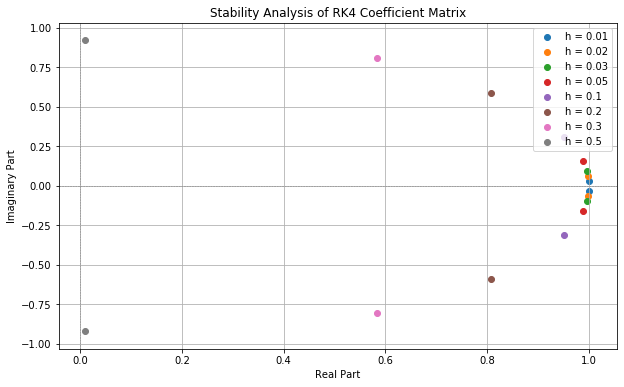

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Create RK4 coefficient matrix
def RK4_coefficient_matrix(A, h):
    return np.eye(len(A)) + h * A

# Check eigenvalues for stability
def check_stability(eigenvalues):
    if all(abs(eigenvalue) < 1 for eigenvalue in eigenvalues):
        return "Solution is Stable"
    else:
        return "Solution may not be Entirely Stable ;)"

# RK4 Method using a coefficient matrix

def RK4(A, h):
    """Generate the RK4 coefficient matrix for a linear system."""
    # Identity matrix
    I = np.eye(len(A))
    
    # RK4 components
    k1 = h * A
    k2 = h * np.dot(A, I + k1 / 2)
    k3 = h * np.dot(A, I + k2 / 2)
    k4 = h * np.dot(A, I + k3)
    
    # RK4 coefficient matrix
    RK4_matrix = I + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return RK4_matrix

# Define the system
h_values = [0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5]  # Different step sizes
k = 10 #spring constant

A = np.array([[0, 1], [-k, 0]])  # System matrix
y0 = np.array([1, 0])  # Initial condition

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop through step sizes
for h in h_values:
    coeff_matrix = RK4(A, h)
    eigenvalues = np.linalg.eigvals(coeff_matrix)
    stability_message = check_stability(eigenvalues)
    print(f"h = {h}: {stability_message}")
    plt.scatter(eigenvalues.real, eigenvalues.imag, label=f"h = {h}")

# Plot configuration
plt.title("Stability Analysis of RK4 Coefficient Matrix")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

#I predicted in Part 2 that my solution would be unstable at a higher step size. I still believe this to be true.
#Even though the eigenvalues conclude stability, it does not account for how larger step sizes in oscillatory systems
#Will end up diverging often, even if the local matrix is stable. I tested Part 2 with a step size of .5 and found my conclusion to be true.